# Term Deposit Customer Prediction using Decision Tree and Ensemble of Models




Goal:

Using the data collected from existing customers, build a model that will help the marketing team 
identify potential customers who are relatively more likely to subscribe term deposit 
and thus increase their hit ratio.

## Dataset Attribute Information

Attributes – 
1. age : (numeric) 
2. job : type of job (categorical) 

3. marital : marital status (categorical) 

4. education : categorical 

5. default : has credit in default? 

6. balance : average yearly balance, in euros (numeric)

7. housing : has housing loan? 

8. loan : has personal loan? 

9. contact : contact communication type 

10. day : last contact day of the month 

11. month : last contact month of year 

12. duration : last contact duration, in seconds 

13. campaign : number of contacts performed during campaign 

14. pdays : number of days that passed by 

15. previous : number of contacts performed previously 

16. poutcome : outcome of the previous marketing campaign

Target – 

17. deposit : No/yes


## Overview


Part 1 - Exploratory Data Analysis 

a. Manual data inspection 

b. Import necessary packages 

c. Loading data set 

d. Univariate analysis 

e. Multivariate analysis 

f. Strategies to address data challenges esp. zero and unknown values, outliers etc. 


Part 2 - Prepare for data analysis 

a. Data type correction (changing categorical to numerical etc.) 

b. Training, validation and test split 


Part 3 - Evaluation of Basic Models - GNB and DT

a. Gaussian Naive Bayes Classifier 

b. Decision Tree Classifier with changes in Hyper-parameters

c. Inference on Basic Models


Part 4 - Ensemble Techniques with various Hyper-Parameters 

a. Ensemble Techniques - Bagging using Gaussian Naive Bayes Classifier

b. Ensemble Techniques - Bagging using Random Forest

c. Ensemble Techniques - Adaboosting

d. Ensemble Techniques - Gradient Boosting

e. Inference on Various Ensemble Models 



## Part 1 - Exploratory Data Analysis

##### Manual data inspection

1.Open csv file and apply filter on first row (column names)
2.Inspect all columns to check range and values 
3.Also check number of 'unknown' values for each column 


Quick Observations for all columns:

1. age: Range is 18 to 95 

2. job: 'unknown' values are 288 

3. education: 'unknown' values are 1857

4. balance: negative values are 3766 GT 5000 values are 2845 

5. contact: 'unknown' values are 13020 

6. day: all values present from 1 to 31 

7. month: all 12 month values present 

8. duration: zero values are 3 values GT 1800 (30 mins) are 107 

9. campaign: values GT 20 are 244 

10. poutcome: 'unknown' values are 36959 

11. pdays: 36954 Negative values in pdays could mean yet to be contacted 

12. previous: only 361 instances when previous GT 9


## Import of necessary packages 

In [1]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np

# For preprocessing the data
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split

# To model the Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# To model the Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

# To model the Bagging classifier
from sklearn.ensemble import BaggingClassifier

# To model the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# To model the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

# To model the Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

# To build the Confusion Matrix
from sklearn.metrics import confusion_matrix

# To report the prediction shape 
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

# To plot graphs (visualization)
import seaborn as sns
sns.set(color_codes=True)
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline 

## Dataset loading and basic analysis 

In [2]:
Bank_df = pd.read_csv("bank-full.csv")

##### A quick look at the data set, columns and values using head()

In [3]:
Bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


##### Check dimensions of the data set in terms of rows and columns using shape and size

In [4]:
print(Bank_df.shape)

(45211, 17)


In [5]:
print(Bank_df.size)

768587


##### Explore the data set in terms of its columns, null values, data types, memory etc. using info()

In [6]:
Bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


##### Data set has no null values for any of its columns, as all columns have 45211 non-null values which is equal to the total count of rows.

In [7]:
Bank_df.groupby("Target").size()

Target
no     39922
yes     5289
dtype: int64

##### Data seems to be highly skewed in terms of the Target

##### Explore the continuous variables in terms of their range and basic statistics using describe() 

In [8]:
Bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Univariate analysis

##### Get overall idea of the distribution of all columns using hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B7FF3C8>,
      dtype=object)

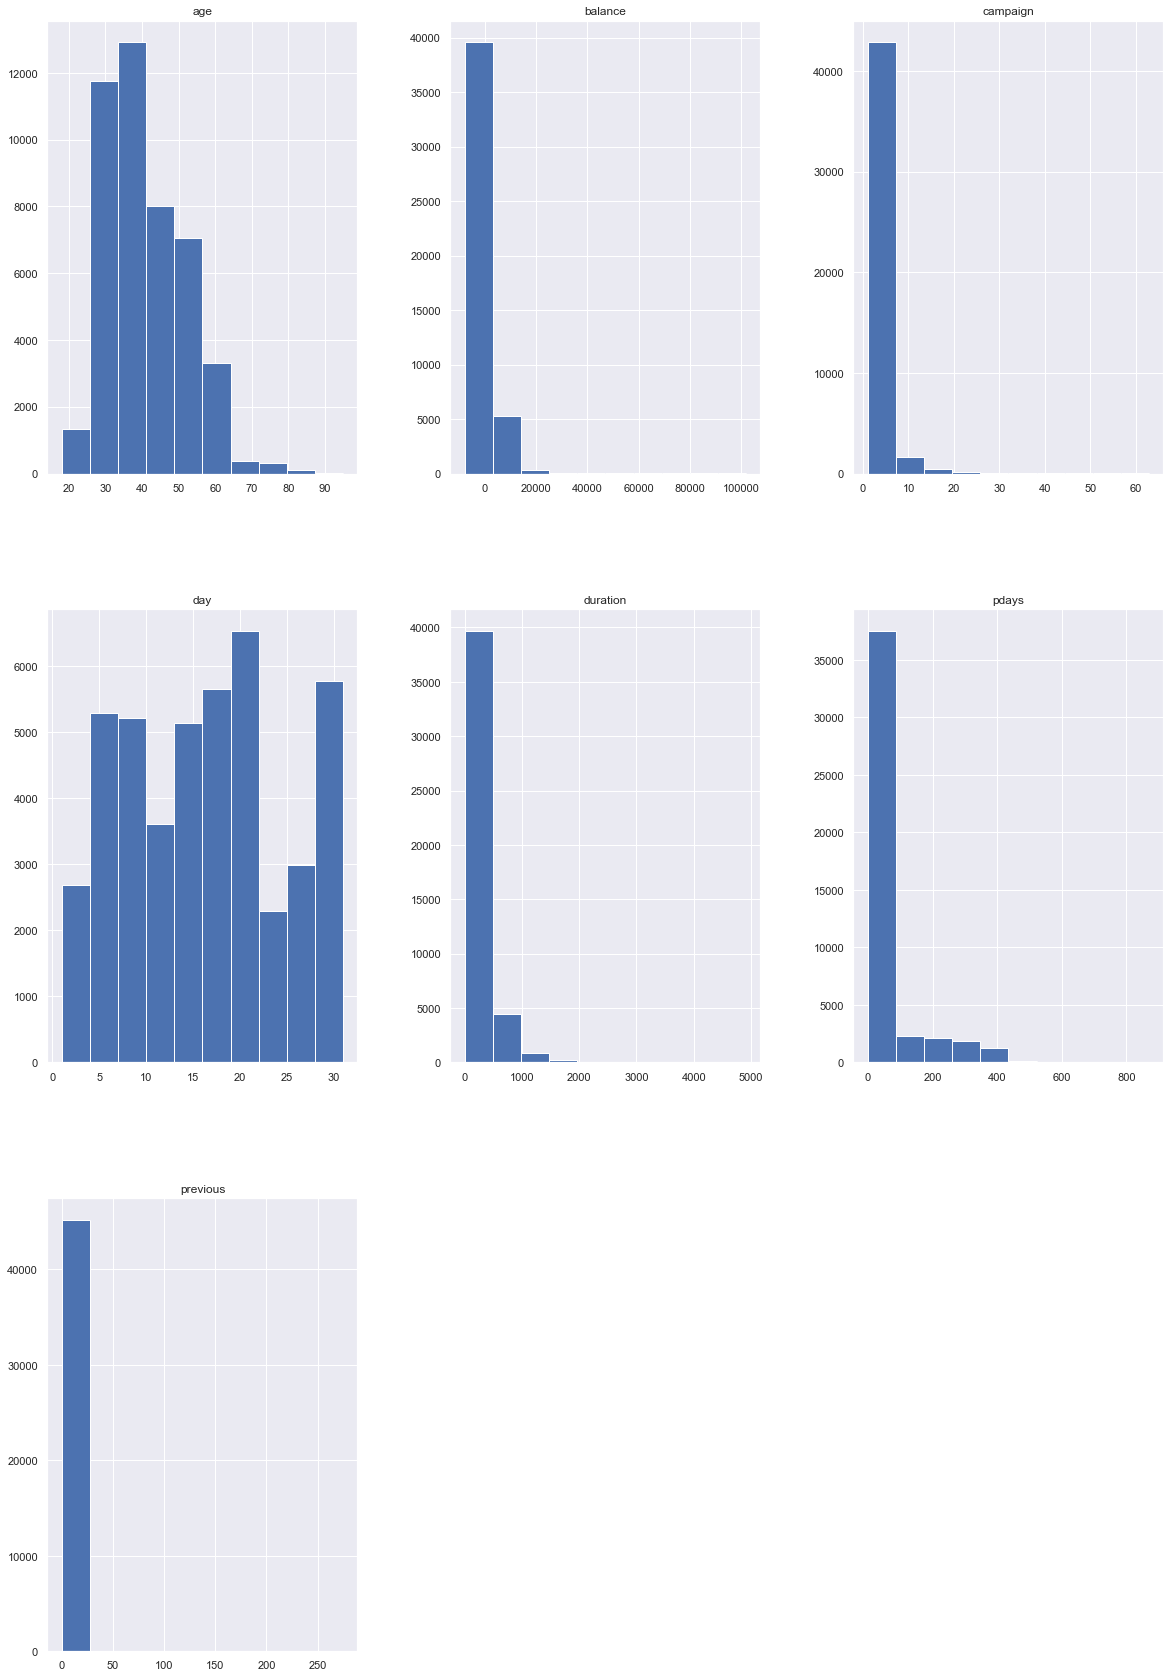

In [9]:
Bank_df.hist(figsize=(20,30))

Inference: Most of the distributions are not normal. 

##### Get getails of distribution of individual attributes using distplot() and boxplot()

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


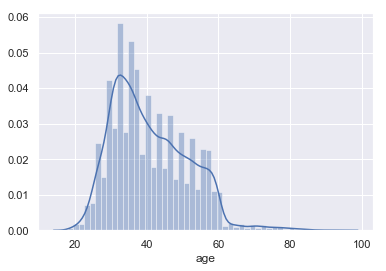

In [10]:
sns.distplot(Bank_df['age'])


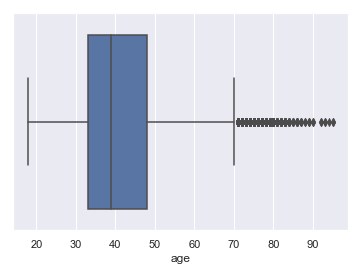

In [11]:
sns.boxplot(Bank_df['age'])

##### Inference for age: 

Majority of the age data points are between 24 to 60. 

This is a right skewed distribution.

There are sizeable data points beyond 60, indicating presence of retired customers. 


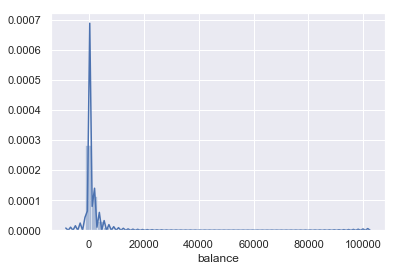

In [12]:
sns.distplot(Bank_df['balance'])

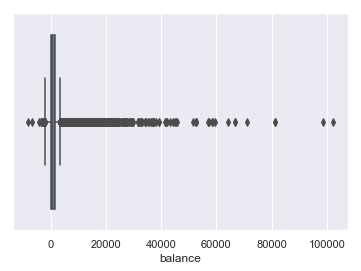

In [13]:
sns.boxplot(Bank_df['balance'])

##### Inference for balance

Large majority of the balances are low, i.e. less than 5000 Euros.

There are several customers having low negative balance as well. 

There are very few, but sizable customers with balance above 10000 Euros. 


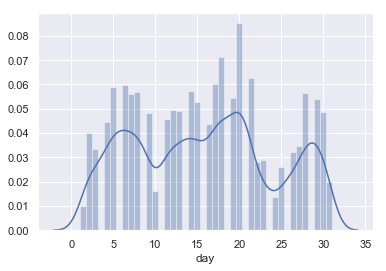

In [14]:
sns.distplot(Bank_df['day'])

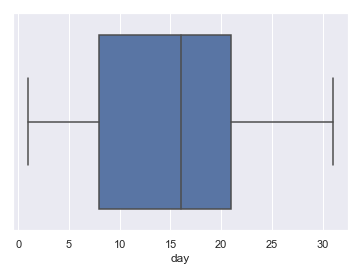

In [15]:
sns.boxplot(Bank_df['day'])

##### Inference for day

The data is more or less evenly spread throughout the month

There are some peaks around 7, 20 and towards end of month

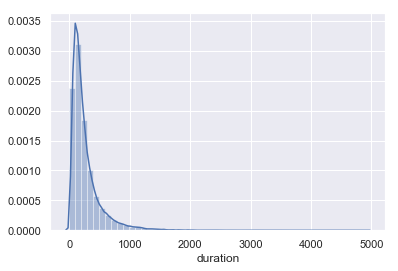

In [16]:
sns.distplot(Bank_df['duration'])

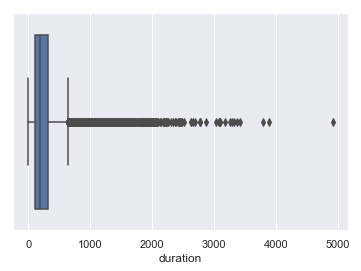

In [17]:
sns.boxplot(Bank_df['duration'])

##### Inference for duration

Majority of the data points have call duration of less than 10 minutes 

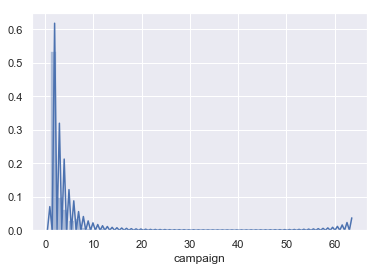

In [18]:
sns.distplot(Bank_df['campaign'])

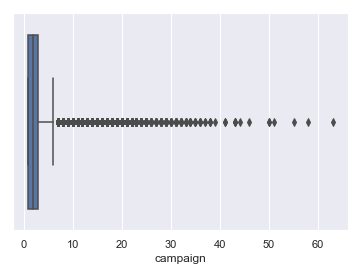

In [19]:
sns.boxplot(Bank_df['campaign'])

##### Inference for campaign

Bulk of the number of contacts is less than 6. 

However, there are several cases where number of contacts are more than 10. 

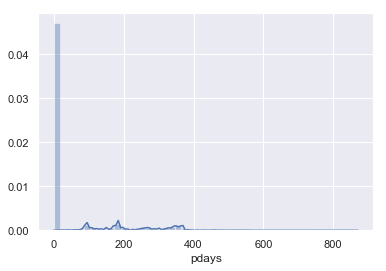

In [20]:
sns.distplot(Bank_df['pdays'])

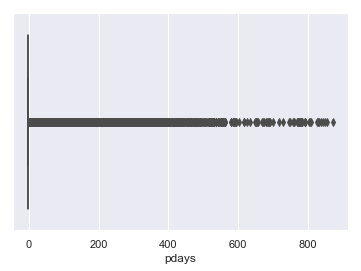

In [21]:
sns.boxplot(Bank_df['pdays'])

##### Inference for pdays

Huge bulk of the value is -1, probably indicating the customer was not contacted. 

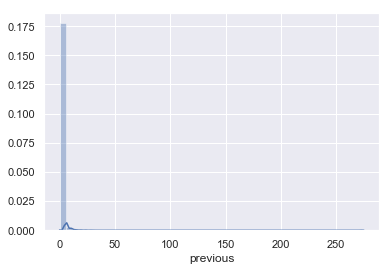

In [22]:
sns.distplot(Bank_df['previous'])

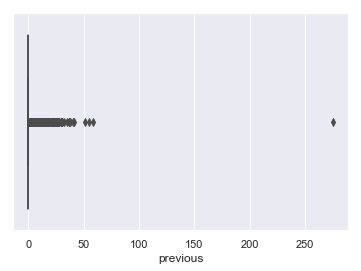

In [23]:
sns.boxplot(Bank_df['previous'])

##### Inference for previous

When pdays is -1, previously is invariably 0. There are more than 36000 such records. 

This indicates the customers who were not contacted in previous campaign. 


##### Get getails of distribution of individual categorical attributes using catplot()

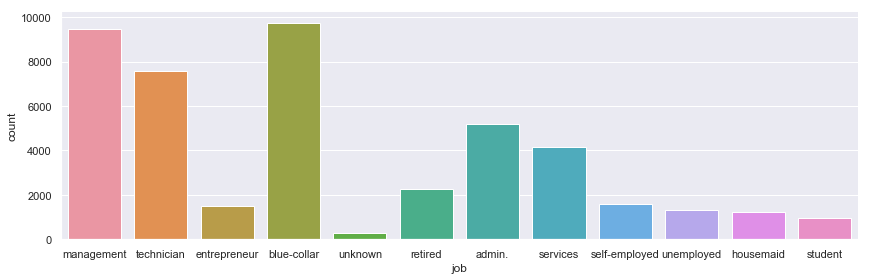

In [24]:
sns.catplot(data=Bank_df, x="job", y=None, kind="count", height=4, aspect=3.0) 

##### Inference for job

There are 11 distinct job types (excluding unknown). 

Top 5 are blue-collar, management, technician, admin. and services.

Since unknown type are very insignificant, they can be ignored. 

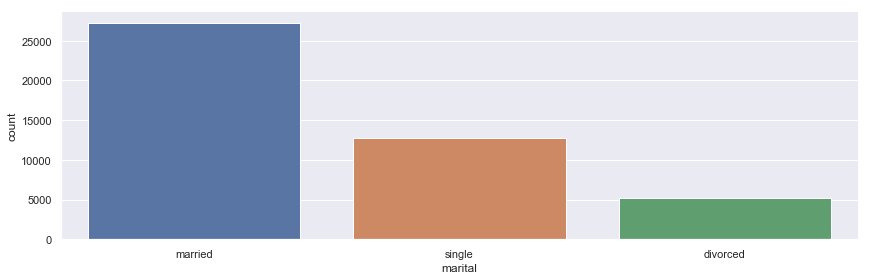

In [25]:
sns.catplot(data=Bank_df, x="marital", y=None, kind="count", height=4, aspect=3.0) 

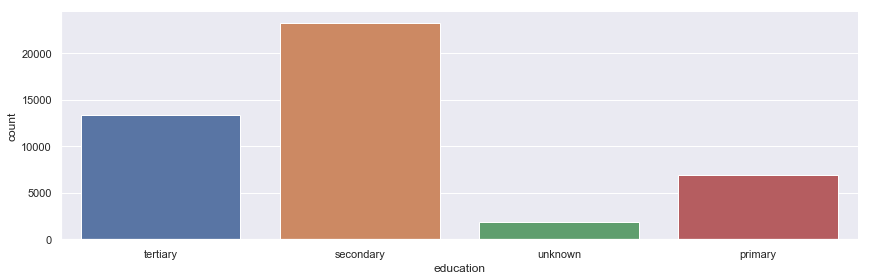

In [26]:
sns.catplot(data=Bank_df, x="education", y=None, kind="count", height=4, aspect=3.0) 

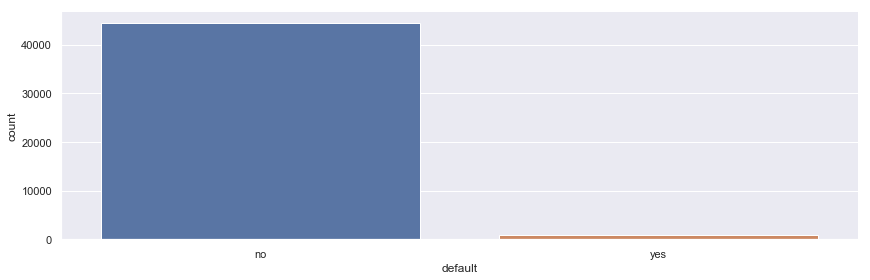

In [27]:
sns.catplot(data=Bank_df, x="default", y=None, kind="count", height=4, aspect=3.0) 

##### Inference for default 

Overwhelming majority of the customers are non defaulters. 

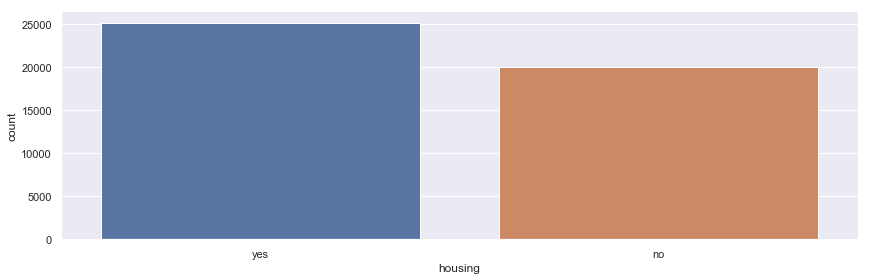

In [28]:
sns.catplot(data=Bank_df, x="housing", y=None, kind="count", height=4, aspect=3.0) 

###### Inference for housing

Majority of the customers have housing loan. 


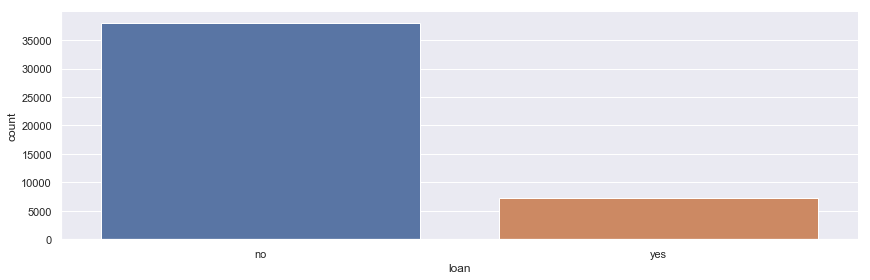

In [29]:
sns.catplot(data=Bank_df, x="loan", y=None, kind="count", height=4, aspect=3.0) 

##### Inference for loan

Large majority (>90%)of the customers have personal loan. 


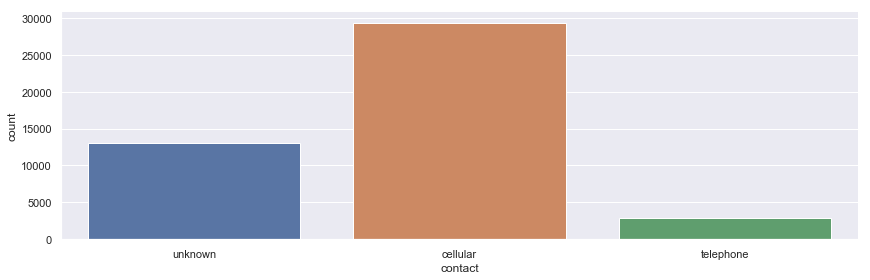

In [30]:
sns.catplot(data=Bank_df, x="contact", y=None, kind="count", height=4, aspect=3.0) 

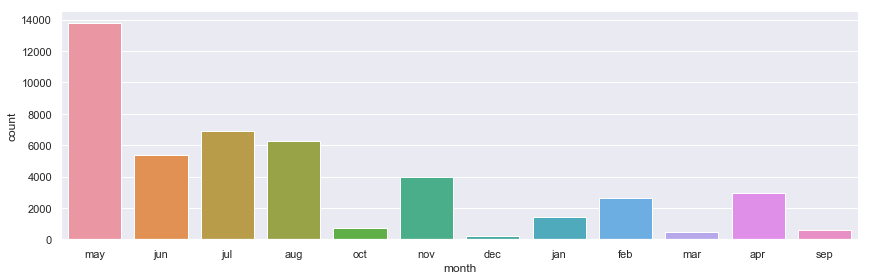

In [31]:
sns.catplot(data=Bank_df, x="month", y=None, kind="count", height=4, aspect=3.0) 

##### Inference for month

Favourite contact month is May. That could be because of a major campaing held in May. 

Followed by July, August and June. 

December, March, September and October are least contact months. 

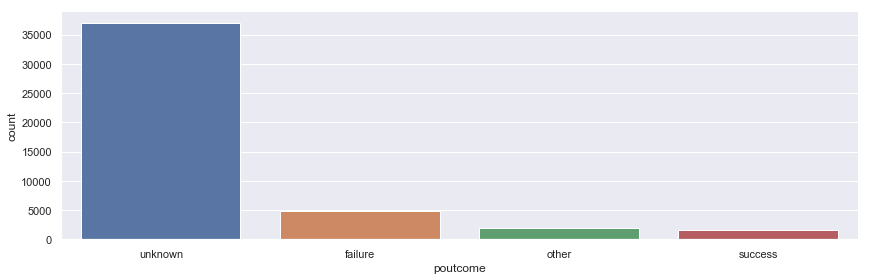

In [32]:
sns.catplot(data=Bank_df, x="poutcome", y=None, kind="count", height=4, aspect=3.0) 

##### Inference for poutcome 

Large majority (above 90%) of the previous outcome is unknown. 

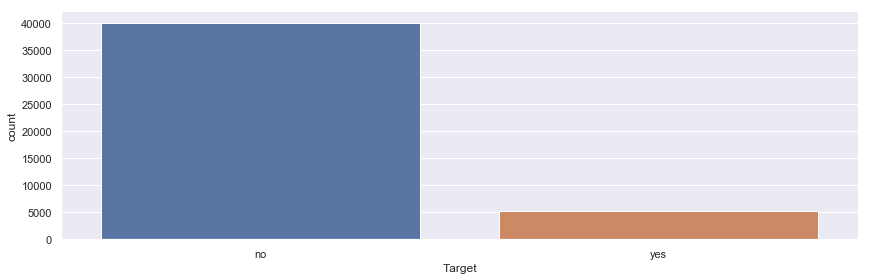

In [33]:
sns.catplot(data=Bank_df, x="Target", y=None, kind="count", height=4, aspect=3.0) 

##### Inference for target

There is a great skew of 8:1 for Target values of no is to yes. 

Means a success rate of 11% only. 

## Multivariate analysis

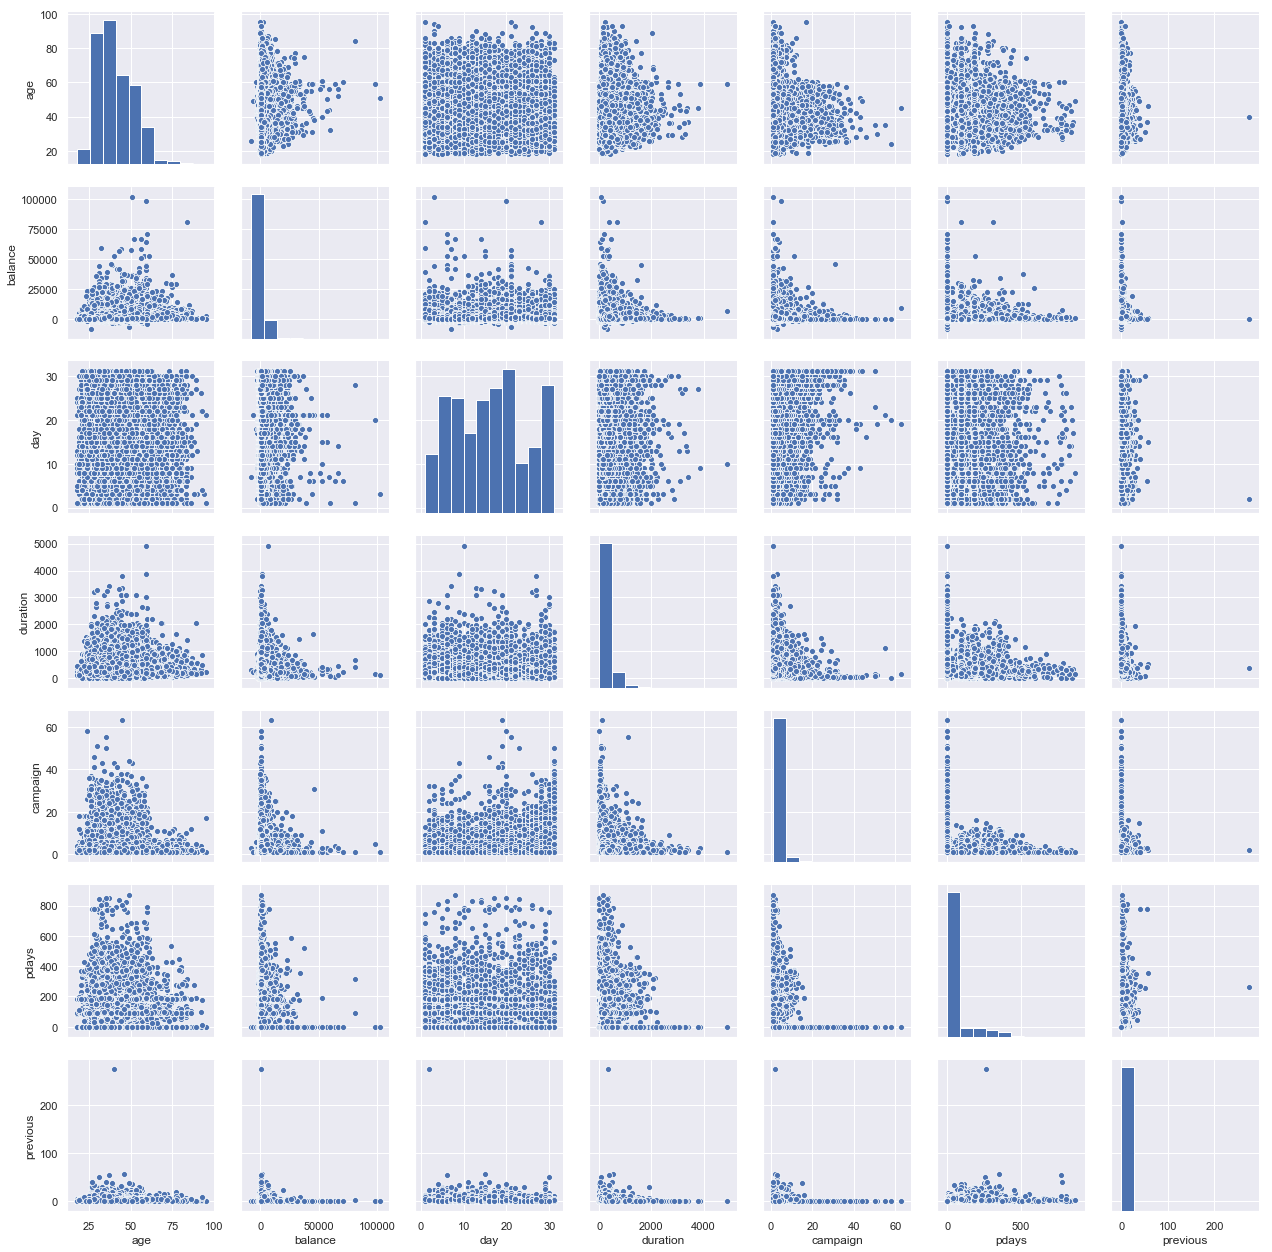

In [34]:
sns.pairplot(Bank_df)

##### Inference for pairplot: 

None of the relationship between continuous variables is linear. 

There is a very high non-corelation between all variables. 

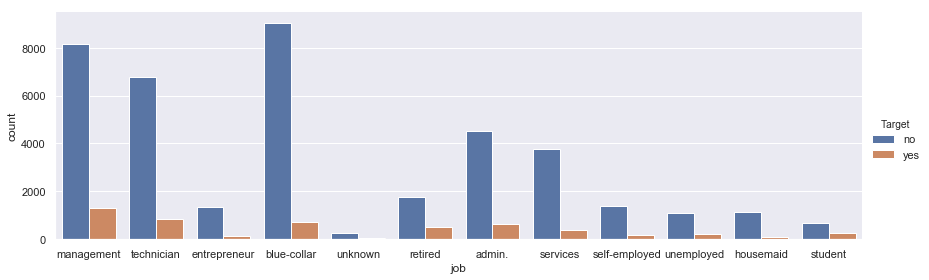

In [35]:
sns.catplot(data=Bank_df, x="job", y=None, hue="Target", kind="count", height=4, aspect=3.0) 

##### Inference:

Proportion of Target yes is maximum in management, retires and technician 

Proportion of Target yes is minimum in entrepreneur, housemaid, blue-collar etc. 


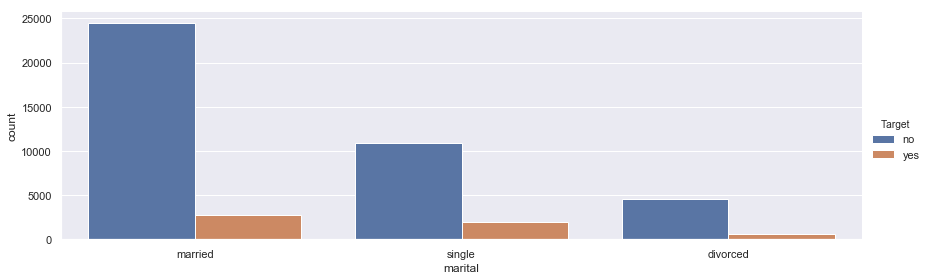

In [36]:
sns.catplot(data=Bank_df, x="marital", y=None, hue="Target", kind="count", height=4, aspect=3.0) 

##### Inference:

Proportion of Target yes seems to be maximum in single



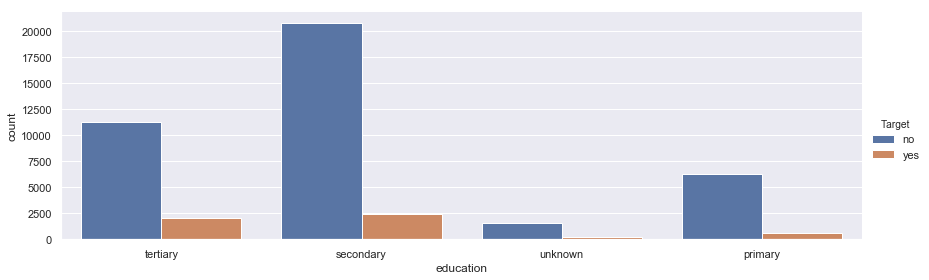

In [37]:
sns.catplot(data=Bank_df, x="education", y=None, hue="Target", kind="count", height=4, aspect=3.0) 

##### Inference:

Proportion of Target yes is maximum in tertiary and secondary 

Proportion of Target yes is minimum in unknown 


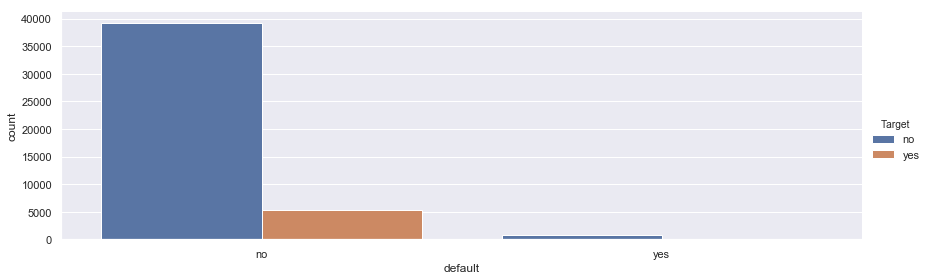

In [38]:
sns.catplot(data=Bank_df, x="default", y=None, hue="Target", kind="count", height=4, aspect=3.0) 

##### Inference:

Clearly, only the non defaulters have Target yes. 


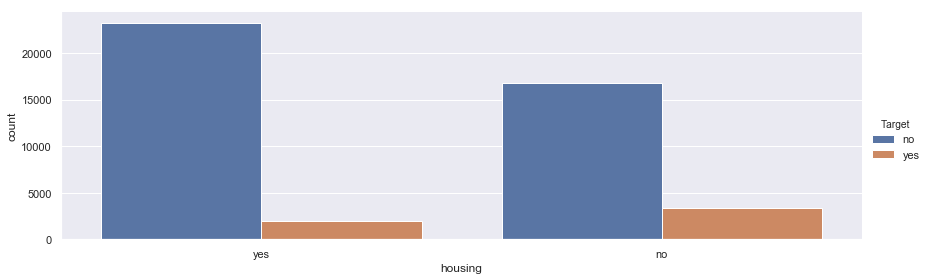

In [39]:
sns.catplot(data=Bank_df, x="housing", y=None, hue="Target", kind="count", height=4, aspect=3.0) 

##### Inference:

Those having no housing loan have higher likelihood of having Target yes 


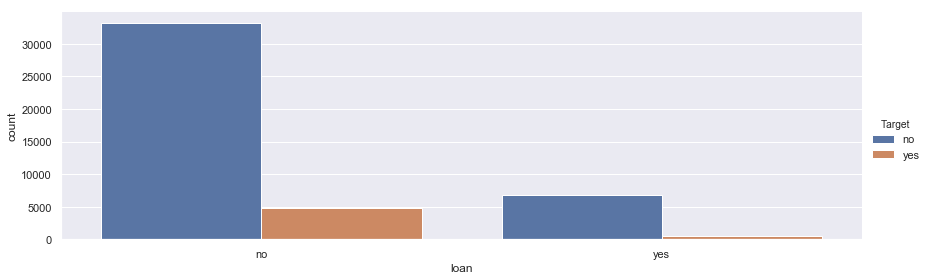

In [40]:
sns.catplot(data=Bank_df, x="loan", y=None, hue="Target", kind="count", height=4, aspect=3.0) 

##### Inference:

Those having no personal loan have much higher likelihood of having Target yes 


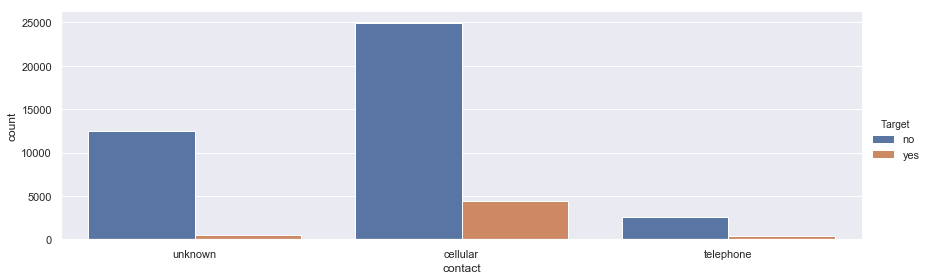

In [41]:
sns.catplot(data=Bank_df, x="contact", y=None, hue="Target", kind="count", height=4, aspect=3.0) 

##### Inference:

Customers with contact type unknown have least likelihood of Target yes 

Customers with contact type cellular have highest likelihood of Target yes 

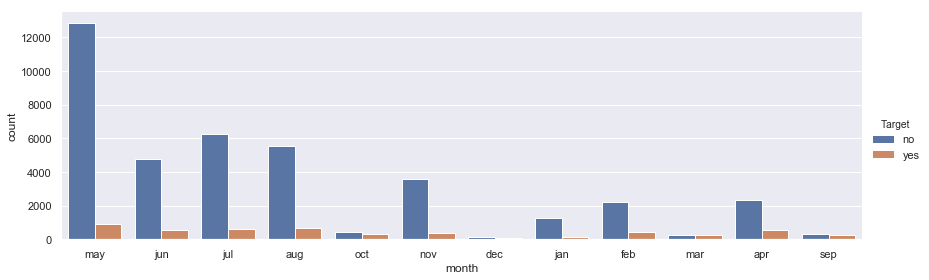

In [42]:
sns.catplot(data=Bank_df, x="month", y=None, hue="Target", kind="count", height=4, aspect=3.0) 

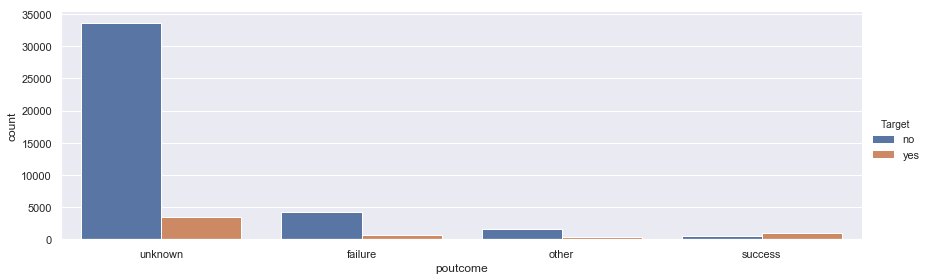

In [43]:
sns.catplot(data=Bank_df, x="poutcome", y=None, hue="Target", kind="count", height=4, aspect=3.0) 

##### Inference:

Customers with previous outcome success have highest likelihood of Target yes 


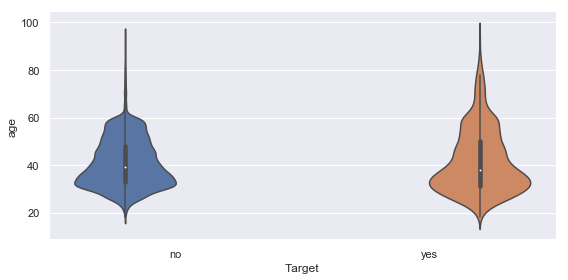

In [44]:
sns.catplot(data=Bank_df, x="Target", y="age", hue="Target", kind="violin", height=4, aspect=2.0) 

##### Inference:

Several old customers are more likely to have Target yes than young customers. 

Common age for Target yes is mid thirties


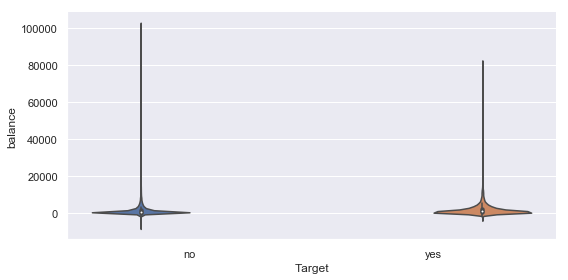

In [45]:
sns.catplot(data=Bank_df, x="Target", y="balance", hue="Target", kind="violin", height=4, aspect=2.0) 

##### Inference:

More customers with higher balance (upto 10000 Euros) are likely to have Target yes

Customers with balance between 80000 Euros to 100000 Euros do not have Target yes. 


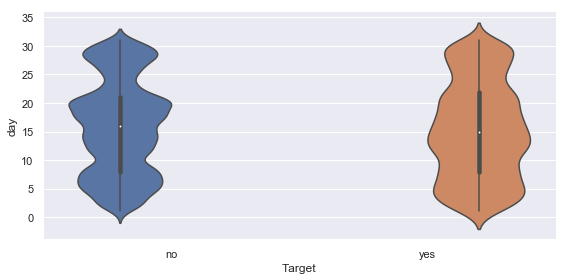

In [46]:
sns.catplot(data=Bank_df, x="Target", y="day", hue="Target", kind="violin", height=4, aspect=2.0) 

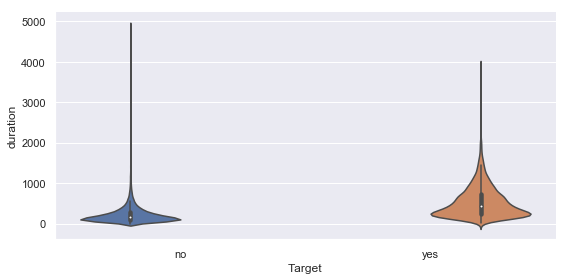

In [47]:
sns.catplot(data=Bank_df, x="Target", y="duration", hue="Target", kind="violin", height=4, aspect=2.0) 

##### Inference:

More proportion of customers with higher call duration are likely to have Target yes. 


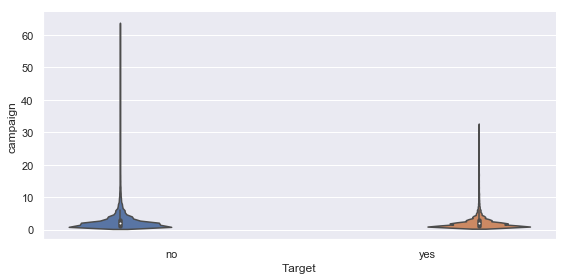

In [48]:
sns.catplot(data=Bank_df, x="Target", y="campaign", hue="Target", kind="violin", height=4, aspect=2.0) 

##### Inference:

More contacts performed do not necessarily increase Target yes. 


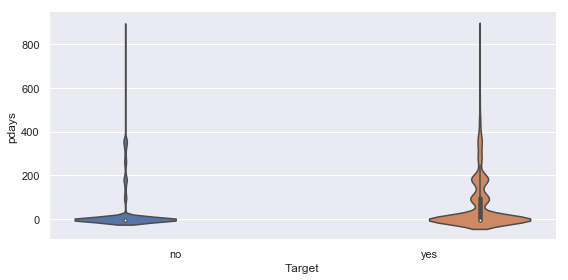

In [49]:
sns.catplot(data=Bank_df, x="Target", y="pdays", hue="Target", kind="violin", height=4, aspect=2.0) 

##### Inference:

Customer that was contacted several days ago may also have a higher likelihood of Target yes. 


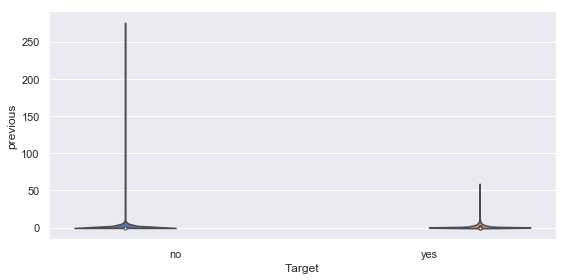

In [50]:
sns.catplot(data=Bank_df, x="Target", y="previous", hue="Target", kind="violin", height=4, aspect=2.0) 

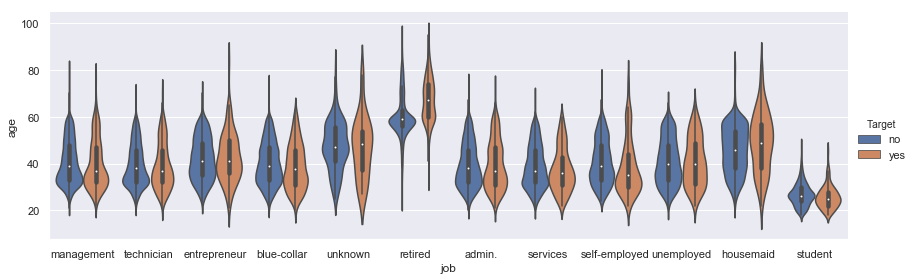

In [51]:
sns.catplot(data=Bank_df, x="job", y="age", hue="Target", kind="violin", height=4, aspect=3.0) 

##### Inference:

Proportion of Target yes generally decreases with age in all job categories 
except unknown and housemaid. 


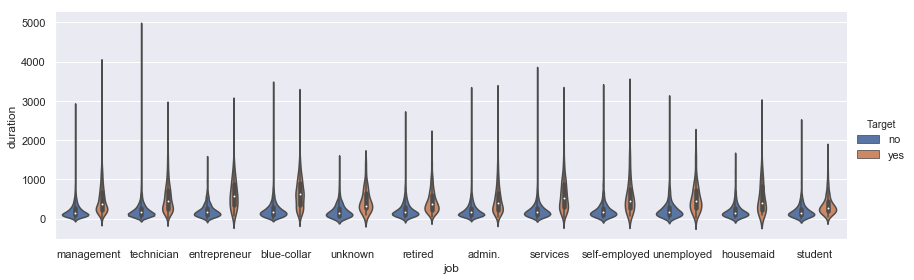

In [52]:
sns.catplot(data=Bank_df, x="job", y="duration", hue="Target", kind="violin", height=4, aspect=3.0)

##### Inference:

Likelihood of Target yes increases with duration of contact 


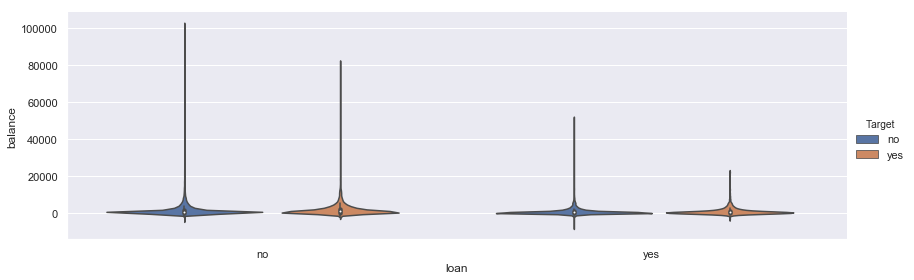

In [53]:
sns.catplot(data=Bank_df, x="loan", y="balance", hue="Target", kind="violin", height=4, aspect=3.0)

##### Inference:

Customers with personal loans obviously have lower balances. 

In both cases, however, customers with balance upto 10000 Euros have maximum likelihood of Target yes. 


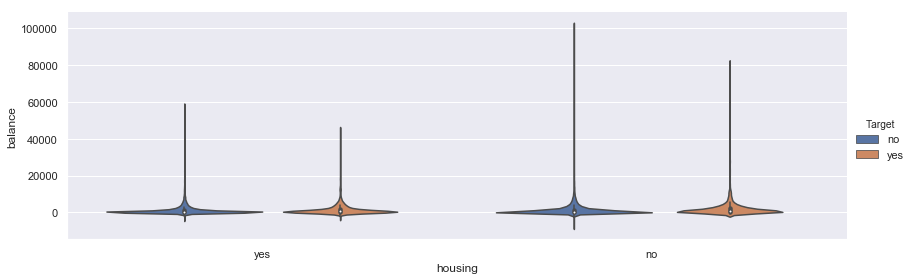

In [54]:
sns.catplot(data=Bank_df, x="housing", y="balance", hue="Target", kind="violin", height=4, aspect=3.0)

##### Inference:

Customers with housing loans obviously have lower balances. 

In both cases, however, customers with balance upto 10000 Euros have maximum likelihood of Target yes. 


##### Create correlation matrix for the data frame

In [55]:
corr = Bank_df.corr()
corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


##### Heat Map for correlation matrix 

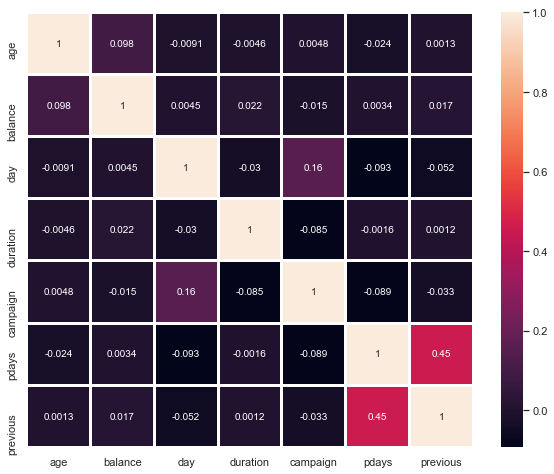

In [56]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True,linewidths=2)

##### Inference from Correlation heat map:

1. All the correlation coefficients have very low values, implying that 
all the variables are more or less independent of each other. 

2. Highest correlation is between pdays and previous, which is already established earlier. 



## Summary of observed relationships from Multivariate Analysis 

1. None of the relationship between continuous variables is linear. 

2. There is a very high non-corelation between all variables. 

3. Proportion of Target yes is maximum in job type management, retires and technician 

4. Proportion of Target yes is minimum in job type entrepreneur, housemaid, blue-collar etc. 

5. Proportion of Target yes seems to be maximum in marital type single

6. Proportion of Target yes is maximum in education type tertiary and secondary 

7. Proportion of Target yes is mainimum in education type unknown 

8. Clearly, only the non defaulters have Target yes. 

9. Those having no housing loan have higher likelihood of having Target yes

10. Those having no personal loan have much higher likelihood of having Target yes 

11. Customers with contact type unknown have least likelihood of Target yes 

12. Customers with contact type cellular have highest likelihood of Target yes 

13. Customers with previous outcome success have highest likelihood of Target yes 

14. Several old customers are more likely to have Target yes than young customers. 

15. Common age for Target yes is mid thirties

16. More customers with higher balance (upto 10000 Euros) are likely to have Target yes

17. Customers with balance between 80000 Euros to 100000 Euros do not have Target yes. 

18. More proportion of customers with higher call duration are likely to have Target yes. 

19. More contacts performed do not necessarily increase Target yes. 

20. Customer that was contacted several days ago may also have a higher likelihood of Target yes.

21. Proportion of Target yes generally decreases with age in all job categories 
except unknown and housemaid. 

22. Likelihood of Target yes increases with duration of contact 

23. Customers with personal loans obviously have lower balances. 
In both cases, however, customers with balance upto 10000 Euros have maximum likelihood of Target yes. 

24. Customers with housing loans obviously have lower balances. 
In both cases, however, customers with balance upto 10000 Euros have maximum likelihood of Target yes. 




## Part 2 - Prepare for data analysis

## Data Type Correction 

In [57]:
for feature in Bank_df.columns: # Loop through all columns in the dataframe
    if Bank_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        Bank_df[feature] = pd.Categorical(Bank_df[feature]).codes # Replace strings with an integer

In [58]:
Bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [59]:
Bank_df.dtypes

age          int64
job           int8
marital       int8
education     int8
default       int8
balance      int64
housing       int8
loan          int8
contact       int8
day          int64
month         int8
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome      int8
Target        int8
dtype: object

In [60]:
Bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


##### All columns are now converted from categorical to numeric

## Data Split - Training & Test 

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Bank_df.loc[:, Bank_df.columns != 'Target'], Bank_df['Target'],random_state=2022, test_size = 0.3)


In [62]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
41863,40,9,1,1,0,2338,0,0,0,16,10,717,2,-1,0,3
34967,39,4,2,2,0,0,0,0,0,6,8,389,2,-1,0,3
41303,57,4,0,3,0,854,0,0,0,27,1,700,4,92,1,0
10055,37,4,2,1,0,235,0,0,2,11,6,27,2,-1,0,3
36123,42,1,1,1,0,4900,1,0,1,11,8,231,1,284,2,0


In [63]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
32785,35,0,1,1,0,437,1,0,0,17,0,123,1,-1,0,3
21230,60,3,1,3,0,5421,0,0,0,18,1,458,4,-1,0,3
24242,43,7,1,1,0,3305,1,0,0,17,9,387,1,-1,0,3
2404,34,1,0,1,0,383,1,0,2,13,8,2231,1,-1,0,3
13305,57,1,1,0,0,0,0,0,0,8,5,237,3,-1,0,3


In [64]:
y_train.head()

41863    1
34967    0
41303    1
10055    0
36123    0
Name: Target, dtype: int8

In [65]:
y_test.head()

32785    0
21230    0
24242    0
2404     1
13305    0
Name: Target, dtype: int8

## Part 3 - Evaluation of Basic Models - GNB and DT

## Gaussian Naive Bayes Classifier 

In [66]:
GB_Classifier = GaussianNB()
GB_Classifier.fit(X_train, y_train)
y_pred = GB_Classifier.predict(X_test)
score  = GB_Classifier.score(X_test,y_test)
print (score)

0.8381745797699793


##### Calculate Confusion Matrix, Recall & Precision

In [67]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[10610,  1352],
       [  843,   759]], dtype=int64)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     11962
           1       0.36      0.47      0.41      1602

   micro avg       0.84      0.84      0.84     13564
   macro avg       0.64      0.68      0.66     13564
weighted avg       0.86      0.84      0.85     13564



##### Apply Decision Tree Classifier and Calculate Score

In [69]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 121)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=121,
            splitter='best')

In [70]:
dt_model.score(X_test, y_test)

0.8725302270716603

In [71]:
dt_model.score(X_train, y_train)

1.0

## Decision Tree Classifier with changes in Hyper-parameters 

##### Iteration 1: Balanced model - class_weight={0:.5,1:.5}, max_depth = 8, min_samples_leaf=12

In [72]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 8, min_samples_leaf=12, random_state = 121)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, criterion='entropy',
            max_depth=8, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=12, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=121,
            splitter='best')

In [73]:
dt_model.score(X_test, y_test)

0.9043055145974639

In [74]:
dt_model.score(X_train, y_train)

0.9097860776692893

##### Iteration 2: Underfit model - class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=24

In [75]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 4, min_samples_leaf=30, random_state = 121)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, criterion='entropy',
            max_depth=4, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=121,
            splitter='best')

In [76]:
dt_model.score(X_test, y_test)

0.8882335594219994

In [77]:
dt_model.score(X_train, y_train)

0.8909533289095333

##### Iteration 3: Overfit model - class_weight={0:.5,1:.5}, max_depth = 20, min_samples_leaf=4

In [78]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 20, min_samples_leaf=4, random_state = 121)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, criterion='entropy',
            max_depth=20, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=121,
            splitter='best')

In [79]:
dt_model.score(X_test, y_test)

0.8853583013860218

In [80]:
dt_model.score(X_train, y_train)

0.9595222295952223

## Inference on Basic Models 

1. In the present case, Decision Tree classifiers showed better accuracy than Gaussian Naive Bayes classifier.  

2. Among various Decision Tree classifiers, decision tree model of Iteration 1 gave best results for both train and test set. 

3. Decision tree model of Iteration 2 was an underfit model, with low accuracy on both train and test sets. 

4. Decision tree model of Iteration 3 was aa overfit model, with higher accuracy on train set. 

## Part 4 - Ensemble Techniques with various Hyper-Parameters 

## Ensemble Techniques - Bagging using Gaussian Naive Bayes Classifier 

##### Iteration 1: n_estimators=25

In [81]:
bgcl = BaggingClassifier(base_estimator = GB_Classifier, n_estimators=25, max_samples=.90, oob_score=True, random_state = 121)

bgcl = bgcl.fit(X_train, y_train)
print(bgcl.oob_score_)

0.8419439441337252


##### Iteration 2: n_estimators=80

In [82]:
bgcl = BaggingClassifier(base_estimator = GB_Classifier, n_estimators=80, max_samples=.90, oob_score=True, random_state = 121)

bgcl = bgcl.fit(X_train, y_train)
print(bgcl.oob_score_)

0.8414699655575568


##### Iteration 3: n_estimators=150

In [83]:
bgcl = BaggingClassifier(base_estimator = GB_Classifier, n_estimators=150, max_samples=.90, oob_score=True, random_state = 121)

bgcl = bgcl.fit(X_train, y_train)
print(bgcl.oob_score_)

0.8403956141182418


##### Inference for parameter values in Bagging using Gaussian Naive Bayes Classifier

1.There is a very small increase in accuracy through use of Bagging Ensemble Techniques (from 83.8 to 84.2)


2.Within bagging, the accuracy dropped slightly after increasing estimators from 20 to 80. 


3.Bagging accuracy increased slightly after increasing estimators from 80 to 150. 


4.Maximum Bagging accuracy was obtained at 20 estimators. 



## Ensemble Techniques - Bagging using Random Forest 

##### Iteration 1: n_estimators = 6 

In [84]:
rfcl = RandomForestClassifier(n_estimators = 6, random_state = 121)
rfcl = rfcl.fit(X_train, y_train)

In [85]:
test_pred = rfcl.predict(X_test)
rfcl.score(X_test, y_test)

0.8953848422294308

##### Iteration 2: n_estimators = 18

In [86]:
rfcl = RandomForestClassifier(n_estimators = 18, random_state = 121)
rfcl = rfcl.fit(X_train, y_train)

In [87]:
test_pred = rfcl.predict(X_test)
rfcl.score(X_test, y_test)

0.9037894426422884

##### Iteration 3: n_estimators = 50

In [88]:
rfcl = RandomForestClassifier(n_estimators = 50, random_state = 121)
rfcl = rfcl.fit(X_train, y_train)

In [89]:
test_pred = rfcl.predict(X_test)
rfcl.score(X_test, y_test)

0.9038631672073135

##### Iteration 4: n_estimators = 120

In [90]:
rfcl = RandomForestClassifier(n_estimators = 120, random_state = 121)
rfcl = rfcl.fit(X_train, y_train)

In [91]:
test_pred = rfcl.predict(X_test)
rfcl.score(X_test, y_test)

0.9059274550280153

##### Inference for Random Forest

1.Accuracy increased with increase in estimators from 6, 18, 50, 120. 


2.After about 120 estimators, the accuracy reached to 0.9059.



## Ensemble Techniques - Adaboosting 

##### Iteration 1: With no base estimator 

In [92]:
abcl = AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, random_state = 121)
abcl = abcl.fit(X_train, y_train)
test_pred = abcl.predict(X_test)
abcl.score(X_test, y_test)

0.8960483633146564

##### Iteration 2: With overfit dt_model as base estimator 

In [93]:
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50, learning_rate=1.0, random_state = 121)
abcl = abcl.fit(X_train, y_train)
test_pred = abcl.predict(X_test)
abcl.score(X_test, y_test)

0.8986287230905338

##### Iteration 3: Increasing estimators with no base estimator

In [94]:
abcl = AdaBoostClassifier(base_estimator=None, n_estimators=100, learning_rate=1.0, random_state = 121)
abcl = abcl.fit(X_train, y_train)
test_pred = abcl.predict(X_test)
abcl.score(X_test, y_test)

0.8982601002654085

##### Iteration 4: Increasing estimators with overfit dt_model 

In [95]:
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=100, learning_rate=1.0, random_state = 121)
abcl = abcl.fit(X_train, y_train)
test_pred = abcl.predict(X_test)
abcl.score(X_test, y_test)

0.897670303745208

##### Inference for Adaboosting

1. Using overfit decision tree model as base estimator gave better score than with no base estimator. 

2. As the estimators increased from 50 to 100, there was a slight drop in the score. 


## Ensemble Techniques - Gradient Boosting 

##### Iteration 1 

In [96]:
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, max_depth=5, random_state = 121)
gbcl = gbcl.fit(X_train, y_train)
test_pred = gbcl.predict(X_test)
gbcl.score(X_test, y_test)

0.9052639339427897

##### Iteration 2

In [97]:
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.27, max_depth=5, random_state = 121)
gbcl = gbcl.fit(X_train, y_train)
test_pred = gbcl.predict(X_test)
gbcl.score(X_test, y_test)

0.908950162194043

##### Iteration 3 

In [98]:
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.27, max_depth=7, random_state = 121)
gbcl = gbcl.fit(X_train, y_train)
test_pred = gbcl.predict(X_test)
gbcl.score(X_test, y_test)

0.9048953111176644

##### Iteration 4 

In [99]:
gbcl = GradientBoostingClassifier(n_estimators = 44, learning_rate = 0.27, max_depth=5, random_state = 121)
gbcl = gbcl.fit(X_train, y_train)
test_pred = gbcl.predict(X_test)
gbcl.score(X_test, y_test)

0.9092450604541433

##### Inference for Gradient Boosting 

1. Increasing the estimators did not necessarily increased the score. 

2. Model gave maximum score in Iteration 4 for particular values of estimators, learning_rate and max_depth. 

## Inference on Various Ensemble Models 

1. For the current data set at hand, the Gradient Boosting algorithm gave maximum score. 

2. This was closely followed by Random Forest algorithms, which also gave highest scores. 

3. Scores from Adaboosting were slightly less than Gradient Boosting and Random Forest Algorithms. 

4. Bagging using Gaussian Naive Bayes Classifier gave quite less scores, but slightly higher than individual GNB classifier. 
